<a href="https://colab.research.google.com/github/itonse/google-colab-archive/blob/main/goohaeyou_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

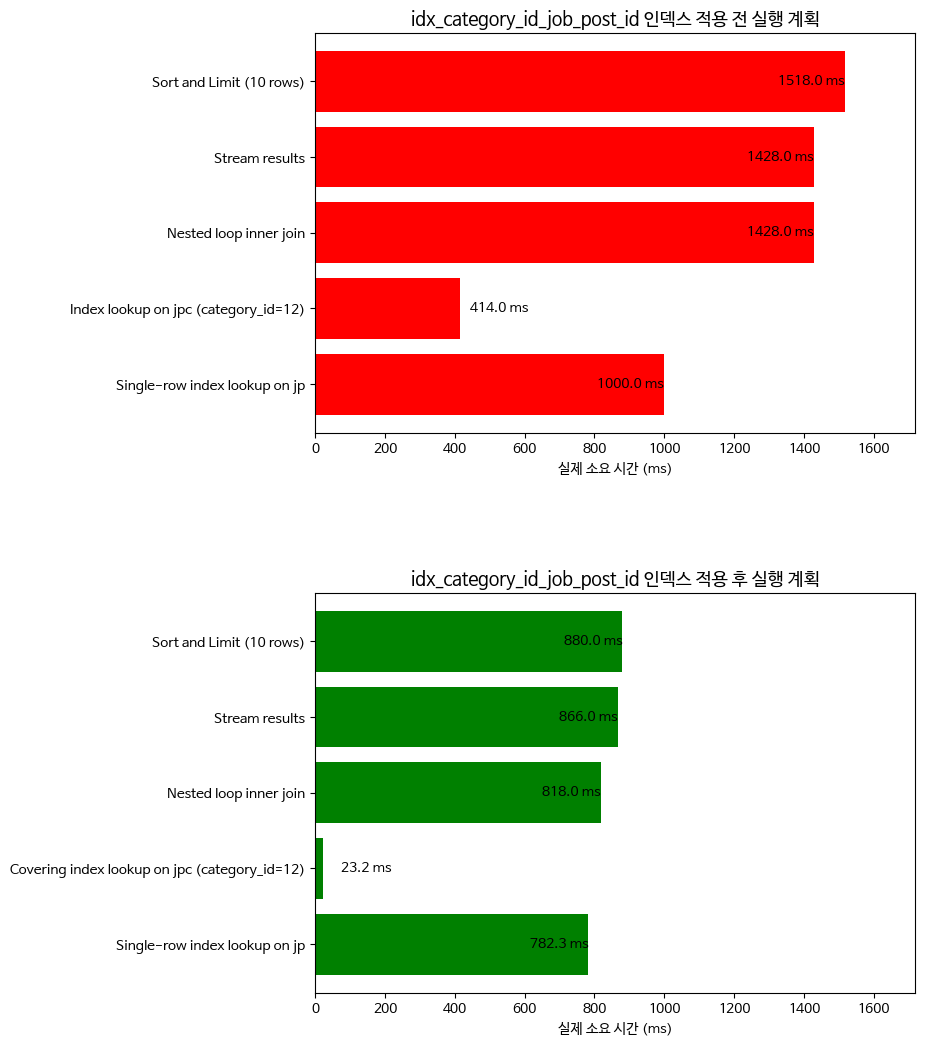

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# 데이터 입력
data_before_corrected = {
    'Step': [
        'Sort and Limit (10 rows)',
        'Stream results',
        'Nested loop inner join',
        'Index lookup on jpc (category_id=12)',
        'Single-row index lookup on jp'
    ],
    'Actual Time (ms)': [1518, 1428, 1428, 414, 999.991],
    'Rows': [10, 58823, 58823, 58823, 58823]
}

data_after_corrected = {
    'Step': [
        'Sort and Limit (10 rows)',
        'Stream results',
        'Nested loop inner join',
        'Covering index lookup on jpc (category_id=12)',
        'Single-row index lookup on jp'
    ],
    'Actual Time (ms)': [880, 866, 818, 23.2, 782.3409],
    'Rows': [10, 58823, 58823, 58823, 58823]
}

# 데이터프레임 생성
df_before_corrected = pd.DataFrame(data_before_corrected)
df_after_corrected = pd.DataFrame(data_after_corrected)

# x축 범위 및 눈금 설정
x_max = max(df_before_corrected['Actual Time (ms)'].max(), df_after_corrected['Actual Time (ms)'].max())
x_ticks = range(0, int(x_max) + 200, 200)

# 시각화 설정
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# 복합 인덱스 적용 전 실행 계획 시각화
ax[0].barh(df_before_corrected['Step'], df_before_corrected['Actual Time (ms)'], color='red')
ax[0].set_title('idx_category_id_job_post_id 인덱스 적용 전 실행 계획', fontsize=13)
ax[0].set_xlabel('실제 소요 시간 (ms)')
ax[0].set_xlim(0, x_max + 200)
ax[0].set_xticks(x_ticks)
ax[0].invert_yaxis()
for index, value in enumerate(df_before_corrected['Actual Time (ms)']):
    if df_before_corrected['Step'][index] == 'Index lookup on jpc (category_id=12)':
        ax[0].text(value + 30, index, f'{value:.1f} ms', va='center', ha='left', fontsize=10, color='black')
    else:
        ax[0].text(value, index, f'{value:.1f} ms', va='center', ha='right', fontsize=10, color='black')

# 복합 인덱스 적용 후 실행 계획 시각화
ax[1].barh(df_after_corrected['Step'], df_after_corrected['Actual Time (ms)'], color='green')
ax[1].set_title('idx_category_id_job_post_id 인덱스 적용 후 실행 계획', fontsize=13)
ax[1].set_xlabel('실제 소요 시간 (ms)')
ax[1].set_xlim(0, x_max + 200)
ax[1].set_xticks(x_ticks)
ax[1].invert_yaxis()
for index, value in enumerate(df_after_corrected['Actual Time (ms)']):
    if "Covering index lookup on jpc" in df_after_corrected['Step'][index]:
        ax[1].text(value + 50, index, f'{value:.1f} ms', va='center', ha='left', fontsize=10, color='black')
    else:
        ax[1].text(value, index, f'{value:.1f} ms', va='center', ha='right', fontsize=10, color='black')

# 그래프 간격 조정
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.4, right=0.9, hspace=0.4)

# 그래프 출력
plt.show()

In [8]:
import matplotlib.font_manager as fm

# 설치된 폰트 확인
for font in fm.findSystemFonts():
    print(fm.FontProperties(fname=font).get_name())

Liberation Sans
Liberation Sans
Liberation Mono
Liberation Serif
Liberation Serif
Humor Sans
Liberation Sans Narrow
Liberation Sans
Liberation Mono
Liberation Sans
Liberation Sans Narrow
Liberation Serif
Liberation Mono
Liberation Sans Narrow
Liberation Sans Narrow
Liberation Mono
Liberation Serif


In [10]:
!apt-get -qq install -y fonts-nanum

Selecting previously unselected package fonts-nanum.
(Reading database ... 123594 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Colab 환경에서 한글 폰트 설치
!apt-get -qq install -y fonts-nanum

# 캐시 파일 삭제
!rm -rf ~/.cache/matplotlib/*

# 런타임을 재시작한 후, 이 코드를 다시 실행하세요.